# Librerias

In [1]:
import pandas as  pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import (
    Dense, Convolution2D, MaxPooling1D, Flatten,
    Activation, Lambda, Convolution1D, Dropout,
    BatchNormalization, GlobalMaxPooling1D, LSTM
)
from keras.utils import to_categorical
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l1_l2
import seaborn as sns

# Obtención de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive

/content/drive


In [4]:
%cd MyDrive/

/content/drive/MyDrive


In [5]:
#!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
#!unzip jena_climate_2009_2016.csv.zip

# Analisis exploratorio de datos

In [6]:
df = pd.read_csv('jena_climate_2009_2016.csv')

In [84]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [7]:
df.tail(1)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420450,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.7,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


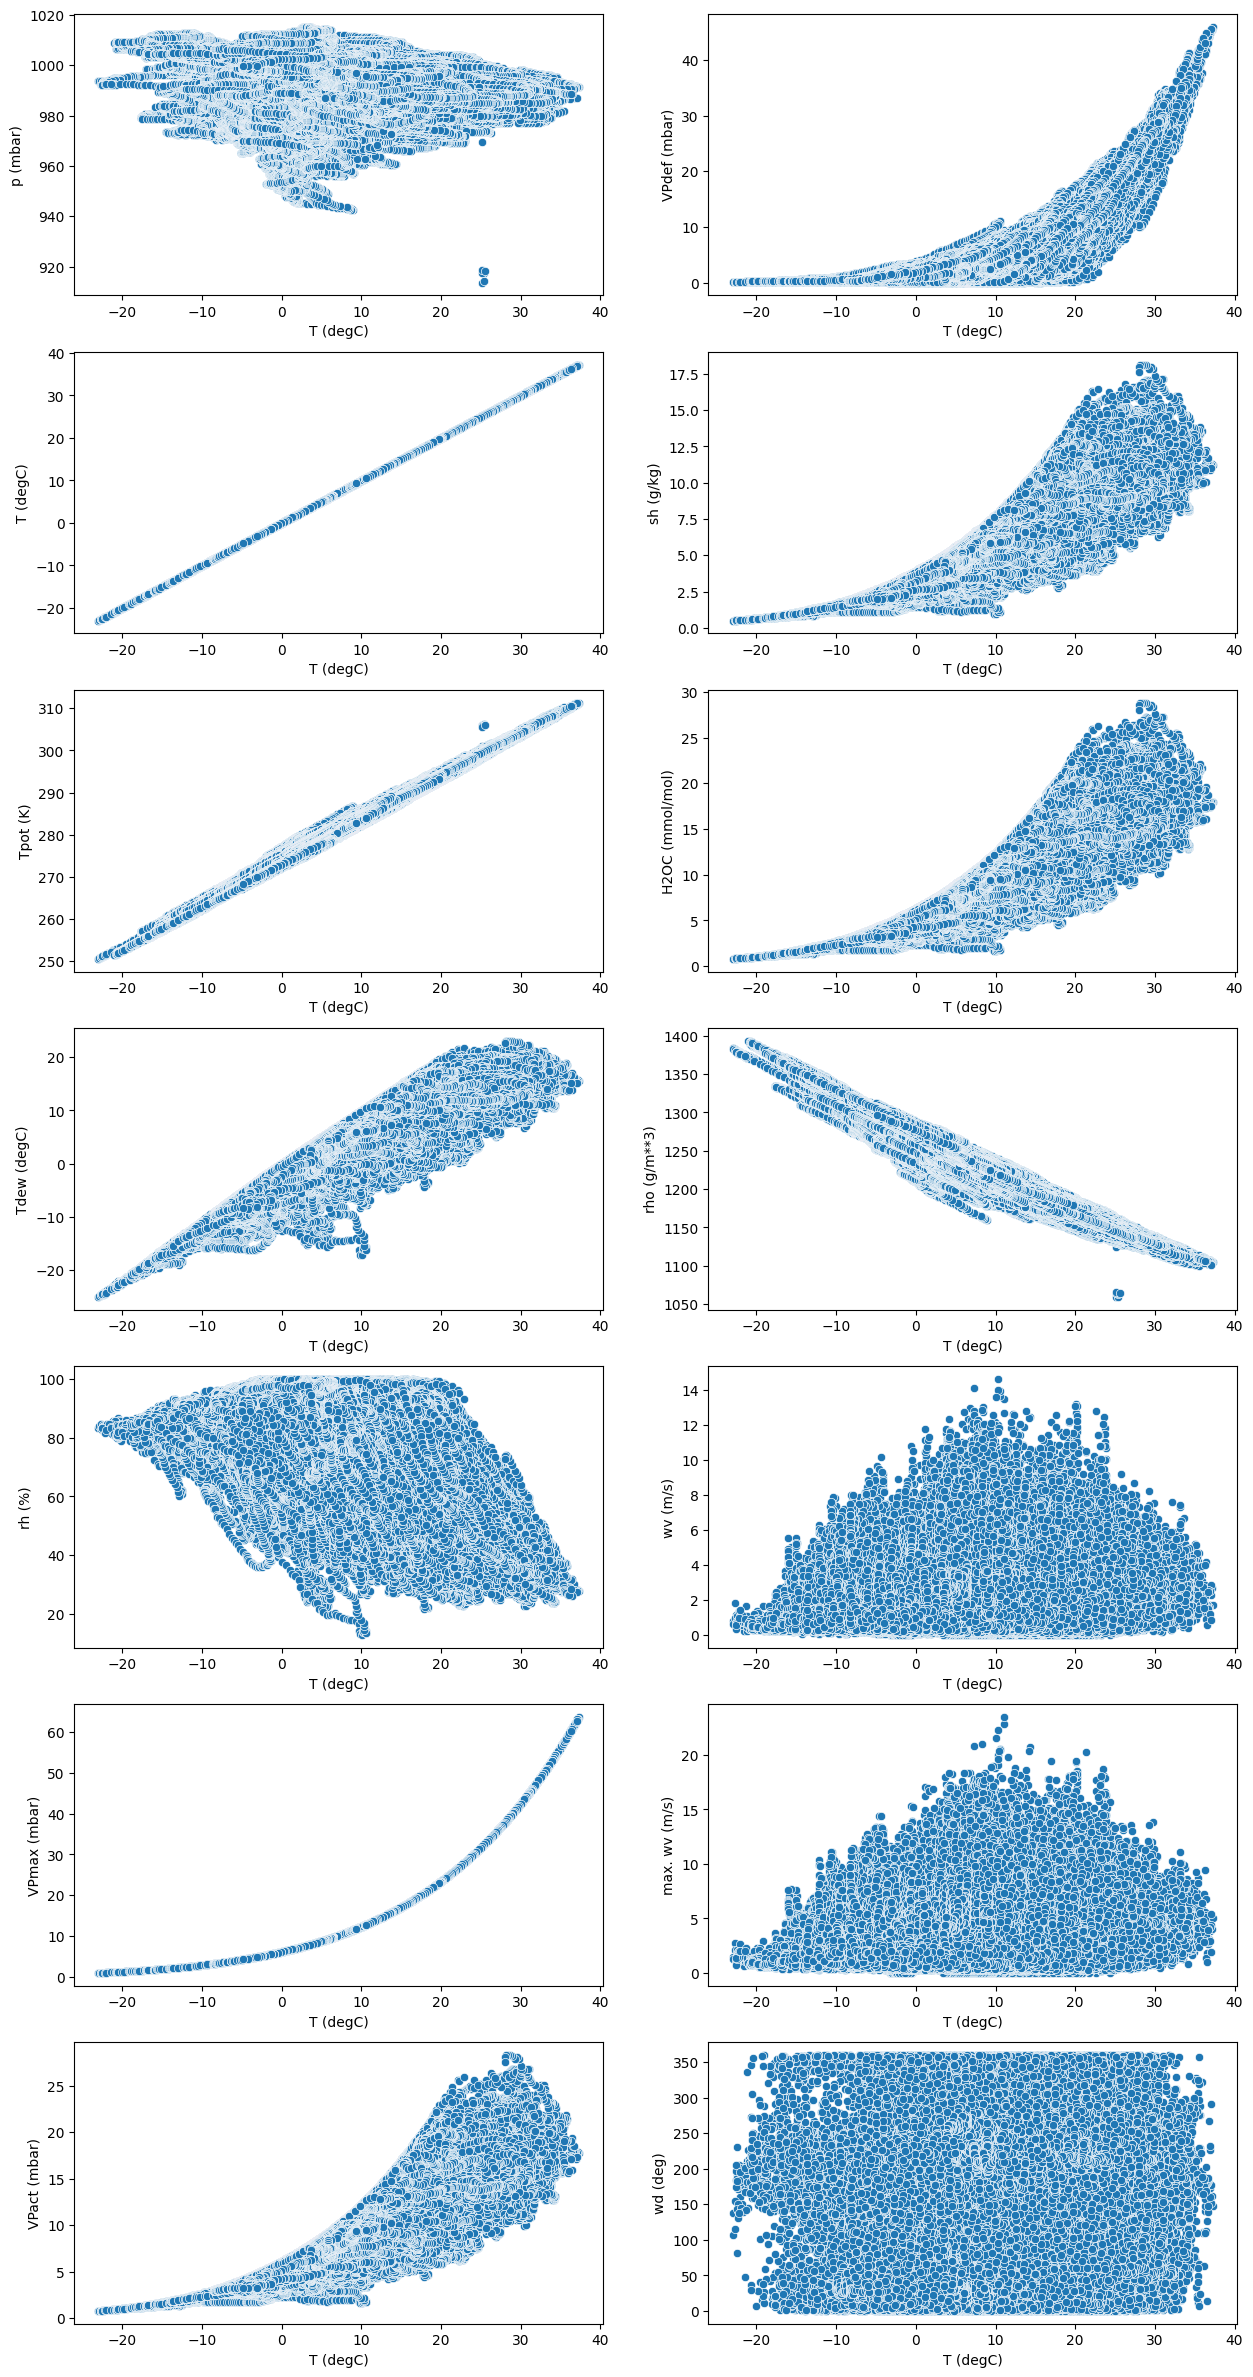

In [8]:
fig, axes = plt.subplots(7, 2, figsize=(15, 30))
l=0
p=0
for j in df.columns.values[1:]:
  sns.scatterplot(ax=axes[l,p],data=df, x='T (degC)',y=f'{j}')
  if l < 6:
    l =l+1
  else:
    l=0
    p=1


In [9]:
df.corr(numeric_only=True)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045402,-0.124751,-0.066803,-0.018368,-0.031565,-0.054420,-0.003395,-0.069815,-0.069857,0.307686,-0.209693,-0.204802,-0.063296
T (degC),-0.045402,1.000000,0.996826,0.895707,-0.572519,0.951109,0.867671,0.761813,0.866752,0.867174,-0.963404,0.088449,0.125173,0.038562
Tpot (K),-0.124751,0.996826,1.000000,0.894912,-0.567226,0.947289,0.866205,0.757028,0.866533,0.866955,-0.981342,0.104709,0.140781,0.043434
Tdew (degC),-0.066803,0.895707,0.894912,1.000000,-0.156738,0.799273,0.968334,0.435854,0.967589,0.968034,-0.885231,-0.053629,-0.036074,0.049665
rh (%),-0.018368,-0.572519,-0.567226,-0.156738,1.000000,-0.615915,-0.151627,-0.843829,-0.150974,-0.151102,0.514373,-0.312276,-0.362902,-0.015919
VPmax (mbar),-0.031565,0.951109,0.947289,0.799273,-0.615915,1.000000,0.824881,0.875639,0.824475,0.824508,-0.901526,0.092518,0.126458,-0.009740
VPact (mbar),-0.054420,0.867671,0.866205,0.968334,-0.151627,0.824881,1.000000,0.449274,0.999851,0.999856,-0.850238,-0.068845,-0.055761,0.018180
VPdef (mbar),-0.003395,0.761813,0.757028,0.435854,-0.843829,0.875639,0.449274,1.000000,0.448759,0.448807,-0.698348,0.205032,0.247491,-0.030922
sh (g/kg),-0.069815,0.866752,0.866533,0.967589,-0.150974,0.824475,0.999851,0.448759,1.000000,0.999997,-0.853322,-0.065340,-0.052414,0.019139
H2OC (mmol/mol),-0.069857,0.867174,0.866955,0.968034,-0.151102,0.824508,0.999856,0.448807,0.999997,1.000000,-0.853767,-0.065264,-0.052304,0.019370


> Podemos ver que **'p (mbar)'**, **'wv (m/s)'**, **'wd (deg)'** y **'max. wv (m/s)'** no tiene relacion lineal con la temperatura y para ahorrar un poco de memoria ram, las vamos a eliminar ya que no representan gran utilidad visto en la grafica

In [10]:
df2 = df
df2 = df2.drop ('p (mbar)', axis = 1)
df2 = df2.drop ('wv (m/s)', axis = 1)
df2 = df2.drop ('wd (deg)', axis = 1)
df2 = df2.drop ('max. wv (m/s)', axis = 1)
df2 = df2.drop('rh (%)', axis=1)

> Podemos ver que **'Tpot (K)'** y **'Tdew (degC)'**   tiene alta relación lineal con la temperatura y para ahorrar un poco de memoria ram, las vamos a eliminar
Además el **'sh (g/kg)'** es muy parecido al **'H2OC (mmol/mol)'** así que eliminaremos uno

In [11]:
df2 = df2.drop('Tpot (K)', axis=1)
df2 = df2.drop('Tdew (degC)', axis=1)
df2 = df2.drop('sh (g/kg)', axis=1)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420451 non-null  object 
 1   T (degC)         420451 non-null  float64
 2   VPmax (mbar)     420451 non-null  float64
 3   VPact (mbar)     420451 non-null  float64
 4   VPdef (mbar)     420451 non-null  float64
 5   H2OC (mmol/mol)  420451 non-null  float64
 6   rho (g/m**3)     420451 non-null  float64
dtypes: float64(6), object(1)
memory usage: 22.5+ MB


In [13]:
df2.head(1)

,Date Time,T (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),H2OC (mmol/mol),rho (g/m**3)
0,01.01.2009 00:10:00,-8.02,3.33,3.11,0.22,3.12,1307.75


Quitamos la columna del tiempo

In [14]:
data = np.array(df2)
data = data[:,1:]
data = np.asarray(data).astype('float32')

Normalizamos los datos

In [15]:
data_normal = data/ np.max(data)
data_normal = data_normal - np.min(data_normal)
data_normal = data_normal/np.max(data_normal)

In [16]:
print(np.max(data_normal))
print(np.min(data_normal))

1.0
0.0


In [17]:
temperature = data_normal[:,0]
raw_data=data_normal[:,:]

In [18]:
print(temperature.shape)
print(raw_data.shape)

(420451,)
(420451, 6)


# Graficamos la serie de tiempo de temperaturas

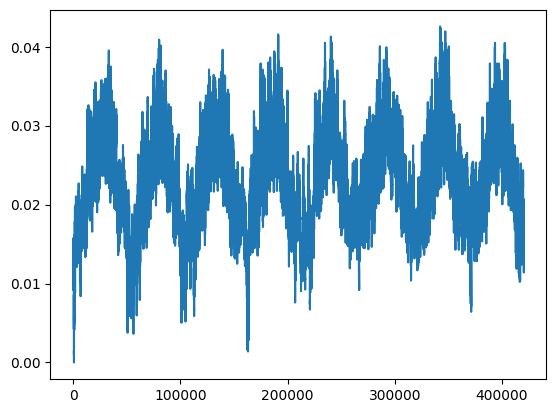

In [19]:
plt.plot(range(len(temperature)), temperature)
plt.show()

Los datos son tomados cada 10 minutos. Tienen mucha resolución!!. Por ejemplo, podemos graficar los primeros diez días. 24x6=144 <- Es el número de datos correspondiente a un día.

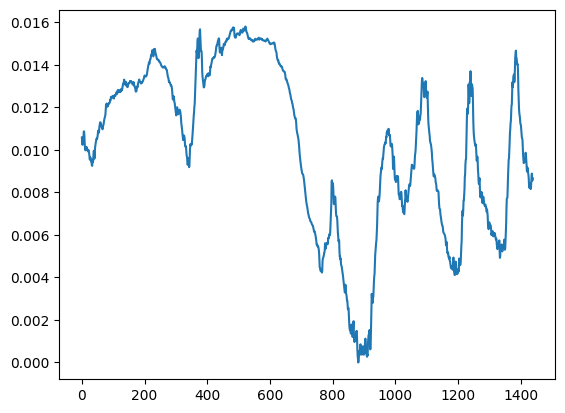

In [20]:
plt.plot(range(1440), temperature[:1440])
plt.show()

# keras.utils.timeseries_dataset_form_array()

Analizar el siguiente código para identificar la funcionalidad de la función : keras.utils.timeseries_dataset_form_array()

In [120]:
int_sequence = np.arange(10) #Generamos un array de enteros del 0 al 9
dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],    #secuencia para valores de x ; array([0, 1, 2, 3, 4, 5, 6])
    targets = int_sequence[3:], #secuencia para extraer los valores y; array([3, 4, 5, 6, 7, 8, 9])
    sequence_length=3,  #tamano de las secuencias x
    sampling_rate=1,
    batch_size=2,  #cada vez que se llame "dataset" nos regresara un batch de 2 secuencias
)

for inputs, targets in dataset:
  print("\n Series X")
  print(inputs)
  print("Valor en y")
  print(targets ,"\n\n")


 Series X
tf.Tensor(
[[0 1 2]
 [1 2 3]], shape=(2, 3), dtype=int64)
Valor en y
tf.Tensor([3 4], shape=(2,), dtype=int64) 



 Series X
tf.Tensor(
[[2 3 4]
 [3 4 5]], shape=(2, 3), dtype=int64)
Valor en y
tf.Tensor([5 6], shape=(2,), dtype=int64) 



 Series X
tf.Tensor([[4 5 6]], shape=(1, 3), dtype=int64)
Valor en y
tf.Tensor([7], shape=(1,), dtype=int64) 




O bien, si queremos visualizar de forma mas ordenada

In [121]:
for inputs, targets in dataset:
   for i in range(inputs.shape[0]):
     print([int(x) for x in inputs[i]], int(targets[i]))
     #Para la serie [0,1,2] su target es el 3 y así...

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


# **Tarea**

## 1.   Genera secuencias x para entrenamiento (50%), validación (25%) y prueba (25%) de 120 elementos de longitud a partir de los datos de temperatura.

In [21]:
#Tenemos un total de elementos
print('Elementos totales: ',len(temperature) )
print('Total de elementos de data: ', len(temperature)-120)
print('Vamos a calcular el total de elementos de la data')
print('\nEl 50%: ',(len(temperature)-120)*.5 )
print('El 25%: ',(len(temperature)-120)*.25 )
print('\nSi los redondeamos tenemos:\n')
print('El 50%: ',int((len(temperature)-120)*.5) )
print('El 25%: ',int((len(temperature)-120)*.25) )

Elementos totales:  420451
Total de elementos de data:  420331
Vamos a calcular el total de elementos de la data

El 50%:  210165.5
El 25%:  105082.75

Si los redondeamos tenemos:

El 50%:  210165
El 25%:  105082


### Ejemplo

In [123]:
int_sequence = np.arange(33) #Generamos un array de enteros del 0 al 9
val_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sampling_rate=1,
    sequence_length=3,
    shuffle=True,
    batch_size=4,
    start_index=0,
    end_index=9)
for inputs, targets in val_dataset:
  print("\n Series X")
  print(inputs)
  print("Valor en y")
  print(targets ,"\n\n")


 Series X
tf.Tensor(
[[2 3 4]
 [6 7 8]
 [5 6 7]
 [0 1 2]], shape=(4, 3), dtype=int64)
Valor en y
tf.Tensor([5 9 8 3], shape=(4,), dtype=int64) 



 Series X
tf.Tensor(
[[1 2 3]
 [3 4 5]
 [4 5 6]], shape=(3, 3), dtype=int64)
Valor en y
tf.Tensor([4 6 7], shape=(3,), dtype=int64) 




### Creación de los datasets

Parámetros para nuestra función generadora de secuencias

In [22]:
delay = 120
sequence_length = 120
sampling_rate = 1
batch_size = 128
num_train_samples = int((len(temperature) - delay)*.5)
num_val_samples = int((len(temperature)-delay)*.25)

len(lines) nos da el numero de datos totales en temperatura, al restarle el delay obtenemos el numero total que hay en data, pero necesitamos quitarle un menos uno para que ahora sea el numero de indice, ya que los indices empiezan desde cero. **Eso lo haremos en el codigo**

Función para partir los datos de temperatura en 50%, 25% y 25%

In [202]:
def capas(data=temperature ,delay=120, sampling_rate=1, batch_size=128, sequence_length=120, start=0, end=10):
    dataset = keras.utils.timeseries_dataset_from_array(
    data=data[:-delay],
    targets=data[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=start,
    end_index=end)
    return dataset

Creamos las secuencias

In [57]:
train_dataset = capas(sequence_length=120,
                       start =0,
                       end = num_train_samples -1, delay=10)
val_dataset = capas(sequence_length=120,
                    start =num_train_samples,
                    end = num_train_samples + num_val_samples -1 ,delay=10)
test_dataset = capas(sequence_length=120,
                    start = num_train_samples + num_val_samples,
                    end = num_train_samples + 2*num_val_samples -1,delay=10)

### Comprobación de la longitud de los datos

In [25]:
def longitud_datos(dataset):
    ds = dataset.unbatch()
    inputs = list(ds.map(lambda x, y: x))
    targets = list(ds.map(lambda x, y: y))
    print('\n Longitud inputs: ',len(inputs))
    print('Longitud targets',len(targets))
    print(' ----------------- \n')

In [142]:
longitud_datos(train_dataset)
longitud_datos(val_dataset)
longitud_datos(test_dataset)


 Longitud inputs:  210045
Longitud targets 210045
 ----------------- 


 Longitud inputs:  104962
Longitud targets 104962
 ----------------- 


 Longitud inputs:  104962
Longitud targets 104962
 ----------------- 



>  Podemos notar que el proceso ha sido un éxito ya que las secuencias generadas son de un total de: datos - 120 ya que son de longitud 120

El reto en el código de arriba es simplemente calcular los valores de start_index y end_idex para obtener el número de secuencias x desadas.

## 2. Construye y entrena una red que estime la temperatura 10 pasos en el futuro. Puedes usar tanto Conv1D o bien LSTM

In [58]:
def slice(x, slice_length):
    return x[:,-slice_length:,:] #(1000, ultimos 'slice_length',1)

In [59]:
seq_length = 120  # Sequence length used for training
look_ahead =  10  # The number of data points the model should predict

#### Modelo

In [172]:
ks = 5
#kernel_reg = l1_l2(1e-05, 1e-05)
model = Sequential()
model.add(Convolution1D(filters=32,
                        kernel_size=ks,
                        padding='causal',
                        dilation_rate=1,
                        batch_input_shape=(None,None, 1)))
model.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=2))
model.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=4))
model.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=8))
model.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=16))
model.add(Dense(1))
model.add(Lambda(slice, arguments={'slice_length':look_ahead}))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, None, 32)          192       
                                                                 
 conv1d_24 (Conv1D)          (None, None, 32)          5152      
                                                                 
 conv1d_25 (Conv1D)          (None, None, 32)          5152      
                                                                 
 conv1d_26 (Conv1D)          (None, None, 32)          5152      
                                                                 
 conv1d_27 (Conv1D)          (None, None, 32)          5152      
                                                                 
 dense_5 (Dense)             (None, None, 1)           33        
                                                                 
 lambda_5 (Lambda)           (None, None, 1)          

La salida del modelo son los 10 pasos de predicción

In [173]:
filepath = "mejor_modelo.hdf5"
    #Checkpoint to save the model
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    #Early stopping
earlystop = EarlyStopping(monitor='val_loss',mode='min',restore_best_weights=True,patience=5,verbose=1)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mean_squared_error',
              metrics=['mse'])
#optimizer='adam'
#optimizer=Adam(learning_rate=0.0001)
histdil = model.fit(train_dataset,
                    epochs=150,
                    batch_size=128,
                    validation_data=val_dataset,
                    verbose=1,
                    callbacks=[checkpoint,earlystop])

Epoch 1/150
1641/1641 [==============================] - ETA: 0s - loss: 9.0262e-06 - mse: 9.0262e-06
Epoch 1: val_loss improved from inf to 0.00001, saving model to mejor_modelo.hdf5
1641/1641 [==============================] - 16s 8ms/step - loss: 9.0262e-06 - mse: 9.0262e-06 - val_loss: 5.2585e-06 - val_mse: 5.2585e-06
Epoch 2/150
  15/1641 [..............................] - ETA: 12s - loss: 7.8388e-06 - mse: 7.8388e-06

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1633/1641 [============================>.] - ETA: 0s - loss: 6.3210e-06 - mse: 6.3210e-06
Epoch 2: val_loss improved from 0.00001 to 0.00001, saving model to mejor_modelo.hdf5
1641/1641 [==============================] - 14s 8ms/step - loss: 6.3061e-06 - mse: 6.3061e-06 - val_loss: 5.0781e-06 - val_mse: 5.0781e-06
Epoch 3/150
1632/1641 [============================>.] - ETA: 0s - loss: 6.2424e-06 - mse: 6.2424e-06
Epoch 3: val_loss did not improve from 0.00001
1641/1641 [==============================] - 13s 8ms/step - loss: 6.2240e-06 - mse: 6.2240e-06 - val_loss: 5.1008e-06 - val_mse: 5.1008e-06
Epoch 4/150
1632/1641 [============================>.] - ETA: 0s - loss: 6.1653e-06 - mse: 6.1653e-06
Epoch 4: val_loss did not improve from 0.00001
1641/1641 [==============================] - 13s 8ms/step - loss: 6.1466e-06 - mse: 6.1466e-06 - val_loss: 5.1077e-06 - val_mse: 5.1077e-06
Epoch 5/150
1641/1641 [==============================] - ETA: 0s - loss: 6.0657e-06 - mse: 6.0657e-06
Epoc

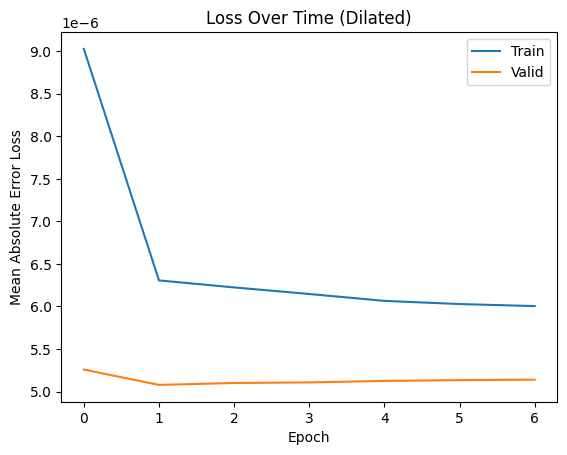

In [174]:
plt.plot(histdil.history['loss'])
plt.plot(histdil.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time (Dilated)')
plt.legend(['Train','Valid'])

In [177]:
def predict_sequence(input_sequence, model, pred_steps):

    K = input_sequence.copy()
    history_sequence = input_sequence.reshape(1,120,1)
    pred_sequence = np.zeros((1,pred_steps * look_ahead,1)) # initialize output (pred_steps time steps)
                                                            # son pasos de look_ahead(10) predicciones cada uno
    for i in range(pred_steps):

        # record next time step prediction (last time step of model output)
        last_step_pred = model.predict(history_sequence)[0,:,0]
        pred_sequence[0,(i * look_ahead) : ((i+1) * look_ahead),0] = last_step_pred

        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence,
                                           last_step_pred.reshape(-1,look_ahead,1)], axis=1)

    return pred_sequence

In [228]:
for inputs, targets in test_dataset:
  X = inputs
  break

In [179]:
B = X[0,:].numpy()
B.shape

(120,)

1/1 [==============================] - 0s 60ms/step


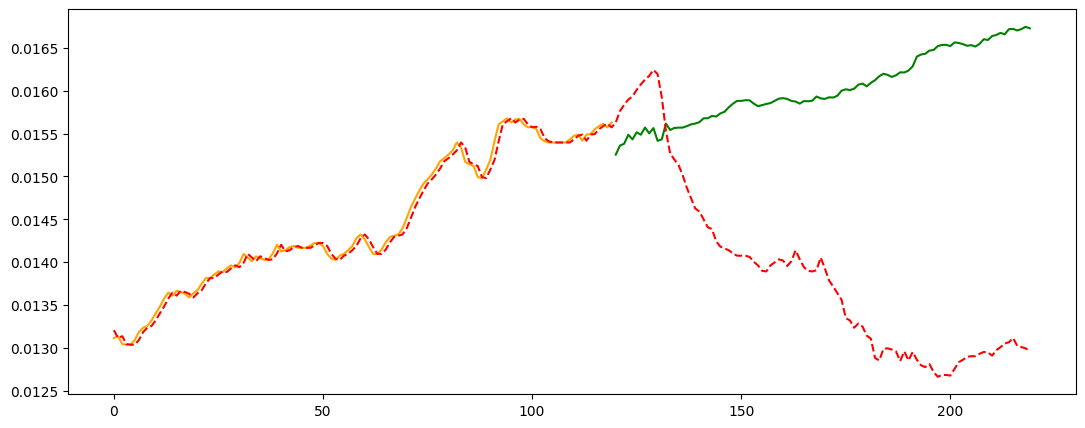

In [180]:
plt.figure(num=None, figsize=(13,5))
pred_steps = 10
ranger = len(B) + pred_steps*look_ahead
plt.plot(range(len(B)),B, color = 'orange')
plt.plot(range(len(B),ranger),
         predict_sequence(B, model, pred_steps)[0,:,0],
         color='green')
plt.plot(range(ranger),
         temperature[num_train_samples + num_val_samples-1 :num_train_samples + num_val_samples+ranger-1],
         linestyle='--',
         color='red')
plt.show()

El resultado puede no ser el deseado pero se entrenó con distintos modelos, poniendo activación relu al final de cada capa (no mejoró).
También se implementó batchnormalization (no mejoró).
Se aumento el número de filtros y de dilatation (se saturo y predecia lo mismo sin importar la entrada).
Se entrenó con LSTM pero no hubo mejora
Al final se  dejo este modelo simple.

## 3. Prueba ahora como datos de entrada las demás variables como presión y las demás.

Aquí hay un ejemplo de como tendrías que constuir las series de tiempo para el último ejercicio:

In [181]:
delay = 120
sequence_length = 120
sampling_rate = 1
batch_size = 128
num_train_samples = int((len(temperature) - delay)*.5)
num_val_samples = int((len(temperature)-delay)*.25)

In [213]:
def capas2(data=temperature, target=temperature,delay=120, sampling_rate=1, batch_size=128, sequence_length=120, start=0, end=10):
    dataset = keras.utils.timeseries_dataset_from_array(
    data=data[:-delay],
    targets=target[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=start,
    end_index=end)
    return dataset

In [218]:
train_dataset2 = capas2(data = raw_data,sequence_length=120,
                    start =0 ,
                    end = num_train_samples -1, delay=10, batch_size =120)
val_dataset2 = capas2(data = raw_data,sequence_length=120,
                    start =num_train_samples,
                    end = num_train_samples + num_val_samples -1 ,delay=10,batch_size =120)
test_dataset2 = capas2(data = raw_data, sequence_length=120,
                    start = num_train_samples + num_val_samples,
                    end = num_train_samples + 2*num_val_samples -1,delay=10,batch_size =120)

In [219]:
for inputs, targets in train_dataset2:
  X = inputs
  Y = targets
  break

In [220]:
X.numpy().shape

(120, 120, 6)

In [224]:
Y.numpy().shape

(120,)

In [300]:
ks = 5
model2 = Sequential()
model2.add(Convolution1D(filters=32,
                        kernel_size=ks,
                        padding='causal',
                        dilation_rate=1,
                        batch_input_shape=(None,None, 6)))
model2.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=2))
model2.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=4))
model2.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=8))
model2.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=16))
model2.add(Dense(1))
model2.add(Lambda(slice, arguments={'slice_length':look_ahead}))

model2.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_98 (Conv1D)          (None, None, 32)          992       
                                                                 
 conv1d_99 (Conv1D)          (None, None, 32)          5152      
                                                                 
 conv1d_100 (Conv1D)         (None, None, 32)          5152      
                                                                 
 conv1d_101 (Conv1D)         (None, None, 32)          5152      
                                                                 
 conv1d_102 (Conv1D)         (None, None, 32)          5152      
                                                                 
 dense_18 (Dense)            (None, None, 1)           33        
                                                                 
 lambda_18 (Lambda)          (None, None, 1)         

La entrada son 6 valores de entrada del dataset y la salida solo son 10 pasos predecidos de la temperatura.

In [301]:
filepath = "mejor_modelo2.hdf5"
    #Checkpoint to save the model
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    #Early stopping
earlystop = EarlyStopping(monitor='val_loss',mode='min',restore_best_weights=True,patience=5,verbose=1)
model2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mean_squared_error', metrics=['mse'])
#optimizer='adam'
#optimizer=Adam(learning_rate=0.0001)
histdil2 = model2.fit(train_dataset2,
                    epochs=30,
                    batch_size=128,
                    validation_data=val_dataset2, verbose=1,
                    callbacks=[checkpoint,earlystop])

Epoch 1/30
1751/1751 [==============================] - ETA: 0s - loss: 3.5515e-04 - mse: 3.5515e-04
Epoch 1: val_loss improved from inf to 0.00010, saving model to mejor_modelo2.hdf5
1751/1751 [==============================] - 19s 9ms/step - loss: 3.5515e-04 - mse: 3.5515e-04 - val_loss: 9.8976e-05 - val_mse: 9.8976e-05
Epoch 2/30
1744/1751 [============================>.] - ETA: 0s - loss: 2.9851e-05 - mse: 2.9851e-05
Epoch 2: val_loss did not improve from 0.00010
1751/1751 [==============================] - 14s 8ms/step - loss: 2.9891e-05 - mse: 2.9891e-05 - val_loss: 1.9625e-04 - val_mse: 1.9625e-04
Epoch 3/30
1743/1751 [============================>.] - ETA: 0s - loss: 2.3979e-05 - mse: 2.3979e-05
Epoch 3: val_loss improved from 0.00010 to 0.00005, saving model to mejor_modelo2.hdf5
1751/1751 [==============================] - 15s 8ms/step - loss: 2.4081e-05 - mse: 2.4081e-05 - val_loss: 4.6311e-05 - val_mse: 4.6311e-05
Epoch 4/30
1742/1751 [============================>.] - ETA:

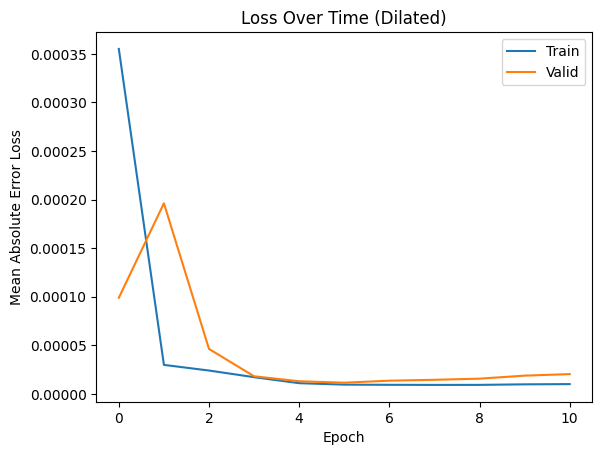

In [302]:
plt.plot(histdil2.history['loss'])
plt.plot(histdil2.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time (Dilated)')
plt.legend(['Train','Valid'])

In [303]:
pred_steps = 10
look_ahead=10

In [304]:
for inputs, targets in test_dataset2:
  X = inputs
  break

In [305]:
B = X[0,:,:].numpy()
B.shape

(120, 6)

1/1 [==============================] - 0s 188ms/step


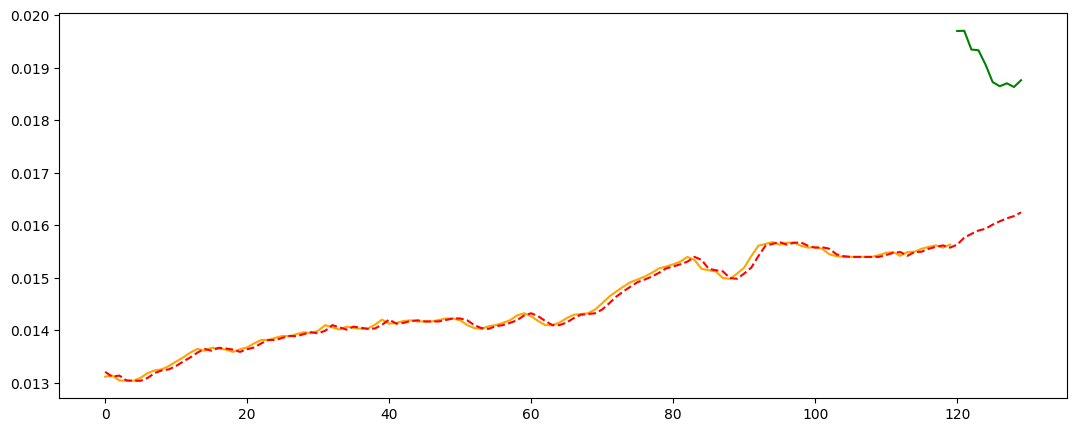

In [306]:
plt.figure(num=None, figsize=(13,5))
pred_steps = 10
ranger = len(B) + look_ahead
plt.plot(range(len(B)),B[:,0], color = 'orange')
plt.plot(range(len(B),ranger),
         model2.predict(B.reshape(1,120,6))[0,:,0],
         color='green')
plt.plot(range(ranger),
         temperature[num_train_samples + num_val_samples-1 :num_train_samples + num_val_samples+ranger-1],
         linestyle='--',
         color='red')
plt.show()

Lo mismo que el anterior se intentó mejorar con varios metodos pero ninguno dio un mejor resultado